### Spectral Layout 

The Spectral Layout is a Graph Visualization Algorithm that uses the eigenvectors of the Laplacian to position the nodes. 
> Like Graph Partitioning, the smallest (nonzero) eigenvalues correspond to well-seperated clusters in the space of eigenvectors

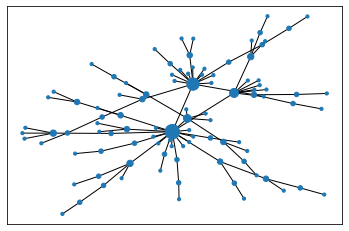

In [2]:
# Standard Presentation
import networkx as nx
G=nx.barabasi_albert_graph(100,1)
nx.draw_networkx(G, node_size=[v*10 for k,v in G.degree], with_labels=False)

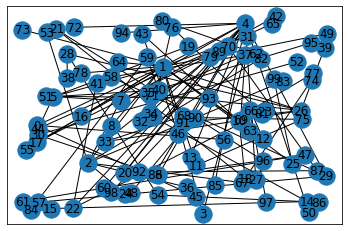

In [3]:
#Start with Random Placement
positions=nx.random_layout(G)
nx.draw_networkx(G,pos=positions)

In [4]:
#Gathering up all the coordinates
import numpy as np
x=0
for k,v in positions.items():
    if type(x)==int:
        x=v
    else:
        x=np.vstack((x,v))

In [5]:
L=nx.linalg.laplacian_matrix(G).todense()

Here I'll implement and iterative version of this algorithm
* using Gradient Descent x'=x-(alpha)grad(cost)
* grad(cost)= 2Lx
* hence x' = (I-alph(2L))x

In [6]:
import matplotlib.pyplot as plt
fig=plt.figure()
alph=0.01
def update():
    global x,L
    x=np.dot((np.eye(100)-alph*2*L),x)
    for i,v in zip(positions.keys(),x):
        positions[i]=np.array(v, dtype=np.float32)[0]

<Figure size 432x288 with 0 Axes>

In [7]:
from IPython import display
import matplotlib.animation 
for i in range(1000):
    update()

Notice the similarities and differences
* both graphs have radially seperated clusters
* our iterative version is randomly selected from the eigenvectors of the Laplacian

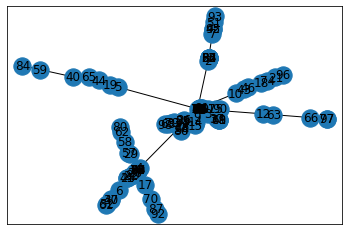

In [8]:
nx.draw_networkx(G, pos=positions)

Here we have the Networkx built in Spectral Layout which uses the eigenvectors which correspond to the two smallest eigenvalues of L.

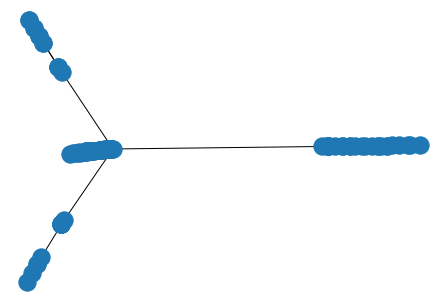

In [9]:
nx.draw_spectral(G)